<a href="https://colab.research.google.com/github/ujinyaa/github_/blob/feat%2F%237-ml/(1)house_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Google Drive Mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [122]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [130]:
train_data_path = '/content/drive/My Drive/Colab Notebooks/data/house_price_prediction/train.csv'
test_data_path = '/content/drive/My Drive/Colab Notebooks/data/house_price_prediction/test.csv'

train_data  = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

print(train_data.head(5))
print(test_data.head(5))

# 기존 Train/Test 데이터 결합
#X_combined = pd.concat([train_data.drop(columns=['SalePrice']), test_data], ignore_index=True)
#y_combined = pd.concat([train_data['SalePrice'], pd.Series([np.nan] * len(test_data))], ignore_index=True)


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

for df, name in zip([df1, df2], ['df1', 'df2']):
    print(f"Processing {name}...")
    for column in df.columns:
        plt.figure(figsize=(8, 6))  # Adjust figure size as needed
        if df[column].dtype in ['int64', 'float64']:  # Numerical columns
            sns.histplot(df[column], kde=True)  # Histogram with KDE
            plt.title(f'Distribution of {column} in {name}')
        else:  # Categorical columns
            sns.countplot(x=column, data=df)  # Countplot
            plt.title(f'Distribution of {column} in {name}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()


X_combined = pd.concat([train_data.drop(columns=['SalePrice']), test_data], ignore_index=True)
y_combined = pd.concat([train_data['SalePrice'], pd.Series([None] * len(test_data))], ignore_index=True)

# 중요 컬럼 배열
numerical_columns = ['LotFrontage', 'OverallQual', 'GrLivArea']
categorical_columns = ['Neighborhood', 'LandSlope', 'SaleType']

# 수치형 데이터 결측치 처리
numeric_imputer = SimpleImputer(strategy='median')
X_combined[numerical_columns] = numeric_imputer.fit_transform(X_combined[numerical_columns])

# 범주형 데이터 결측치 처리
categorical_imputer = SimpleImputer(strategy='most_frequent')
X_combined[categorical_columns] = categorical_imputer.fit_transform(X_combined[categorical_columns])

# Train/Test 분리: SalePrice가 존재하는 부분과 없는 부분
X_train = X_combined[y_combined.notnull()]
y_train = y_combined[y_combined.notnull()]
X_test = X_combined[y_combined.isnull()]

# Combine existing Train and Test datasets
X_combined = pd.concat([pd.DataFrame(X_train), pd.DataFrame(X_test)], ignore_index=True)
y_combined = pd.concat([pd.Series(y_train), pd.Series(y_test)], ignore_index=True)

# Re-split the combined data into 7:3 Train/Test ratio
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    X_combined, y_combined, test_size=0.3, random_state=42
)

# 결과 확인
print(f"New Train Shape: {X_train_new.shape}")
print(f"New Test Shape: {X_test_new.shape}")


# 전처리 파이프라인
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse=False), categorical_columns),  # One-Hot Encoding for categorical columns
        ('num', StandardScaler(), numerical_columns)  # Scaling for numerical columns
    ],
    remainder='passthrough'
)

# Train 데이터 전처리
X_train_transformed = preprocessor.fit_transform(X_train_new)

# Test 데이터 전처리
X_test_transformed = preprocessor.transform(X_test_new)

# 결과 확인
print(f"Transformed Train Shape: {X_train_transformed.shape}")
print(f"Transformed Test Shape: {X_test_transformed.shape}")


In [131]:
# 중요 컬럼 배열 지정
numerical_columns = [
    'LotFrontage', 'OverallQual', 'GrLivArea', 'GarageCars',
    'TotalBsmtSF', '1stFlrSF', 'MasVnrArea', 'GarageYrBlt',
    'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'YearBuilt', 'YearRemodAdd'
]
categorical_columns = [
    'Neighborhood', 'LandSlope', 'MasVnrType', 'Alley', 'BsmtQual', 'BsmtCond',
    'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu',
    'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
    'MiscFeature', 'SaleType'
]

# 컬럼 타입 기반으로 추가적인 컬럼 검색
numeric_cols_in_data = X_combined.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols_in_data = X_combined.select_dtypes(include=['object']).columns.tolist()

missing_numerical = [col for col in numeric_cols_in_data if col not in numerical_columns]
missing_categorical = [col for col in categorical_cols_in_data if col not in categorical_columns]

# 누락된 컬럼을 추가
numerical_columns.extend(missing_numerical)
categorical_columns.extend(missing_categorical)

# 결측치 처리
numeric_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')

X_combined[numerical_columns] = numeric_imputer.fit_transform(X_combined[numerical_columns])
X_combined[categorical_columns] = categorical_imputer.fit_transform(X_combined[categorical_columns])

print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)

Numerical Columns: ['LotFrontage', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'MasVnrArea', 'GarageYrBlt', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'YearBuilt', 'YearRemodAdd', 'Id', 'MSSubClass', 'LotArea', 'OverallCond', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
Categorical Columns: ['Neighborhood', 'LandSlope', 'MasVnrType', 'Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd'

In [132]:
# 데이터프레임의 컬럼 이름 확인
print("Train Data Columns:", train_data.columns.tolist())
print("Test Data Columns:", test_data.columns.tolist())

Train Data Columns: ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 

In [133]:
# 전처리 파이프라인 구성
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_columns),
        ('num', StandardScaler(), numerical_columns)
    ],
    remainder='passthrough'
)

# 전처리 실행
X_transformed = preprocessor.fit_transform(X_combined)
print(f"Transformed Data Shape: {X_transformed.shape}")

Transformed Data Shape: (2919, 246)


In [134]:
# SalePrice를 타겟으로 설정
y_combined = train_data['SalePrice']

# 5:5 데이터셋으로 유지 (케글에서 제공된 원본 분리 유지)
X_train = X_transformed[:len(train_data)]
X_test = X_transformed[len(train_data):]
y_train = train_data['SalePrice']
y_test = None  # 테스트 데이터의 타겟은 케글에서는 제공하지 않을 가능성이 있음

# 결과 확인
print(f"Train Shape: {X_train.shape}, {y_train.shape}")
print(f"Test Shape: {X_test.shape}")  # Test 데이터 크기만 확인

Train Shape: (1460, 246), (1460,)
Test Shape: (1459, 246)


상관관계 분석

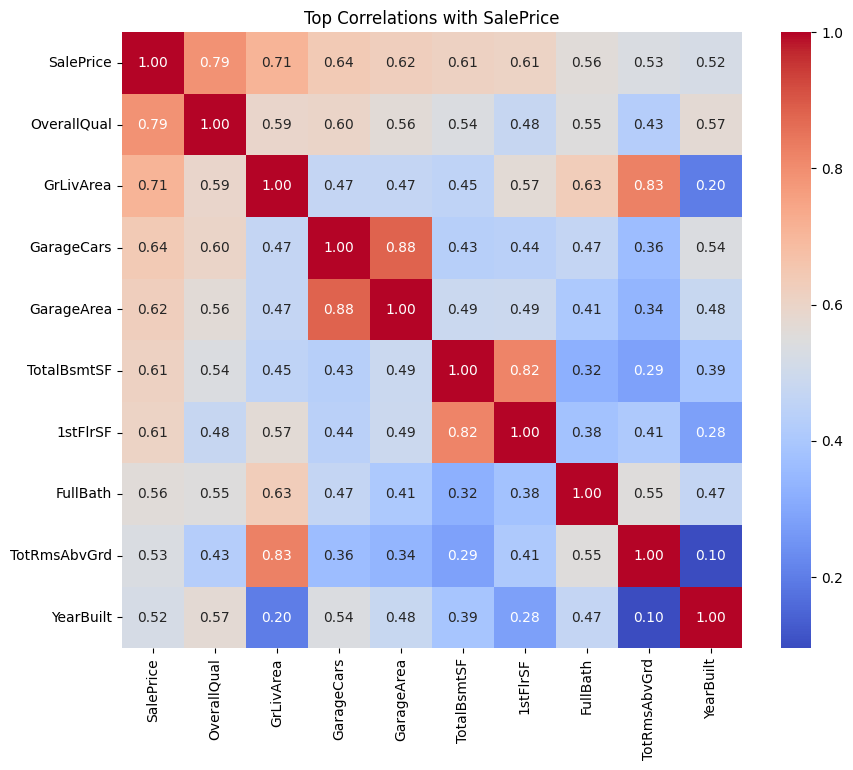

In [135]:
# 상관계수 계산 (수치형 데이터만)
numerical_data = train_data.select_dtypes(include=['float64', 'int64'])
corr_matrix = numerical_data.corr()

# SalePrice와의 상관계수 상위 10개 선택
top_corr_features = corr_matrix['SalePrice'].abs().sort_values(ascending=False).head(10)

# 상관관계 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix.loc[top_corr_features.index, top_corr_features.index], annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Top Correlations with SalePrice')
plt.show()



분류 진행

In [136]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [143]:
# PCA를 사용한 차원 축소
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train_scaled)
X_test_2d = pca.transform(X_test_scaled)
# perceptron_2d 코드에서 사용할 변수 재설정
X_train_data, y_train_data = X_train_2d, y_train

Train Accuracy (Perceptron): 0.008904109589041096


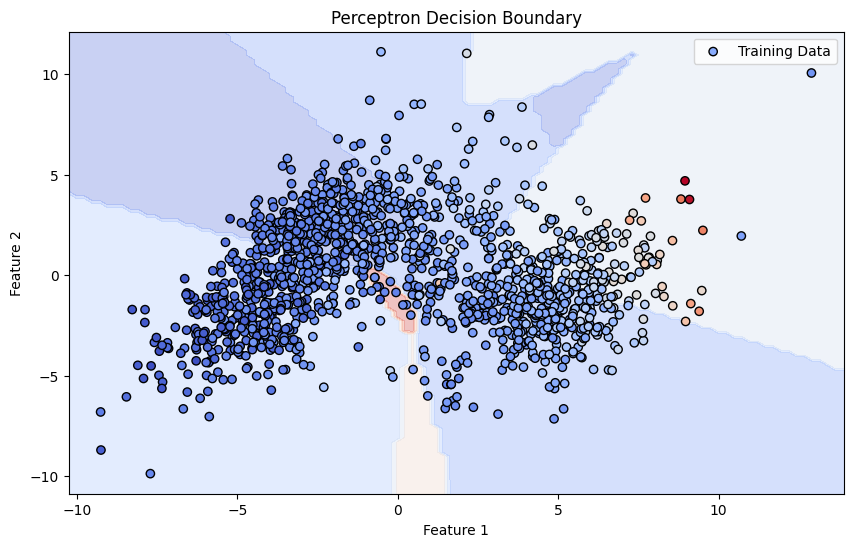

In [144]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Perceptron 초기화 및 학습
perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
perceptron.fit(X_train_data, y_train_data)

# Train 데이터 정확도 계산
train_accuracy_perceptron = accuracy_score(y_train_data, perceptron.predict(X_train_data))
print("Train Accuracy (Perceptron):", train_accuracy_perceptron)

# Perceptron Decision Boundary 시각화
x, y = np.meshgrid(
    np.linspace(X_train_data[:, 0].min() - 1, X_train_data[:, 0].max() + 1, 100),
    np.linspace(X_train_data[:, 1].min() - 1, X_train_data[:, 1].max() + 1, 100)
)
Z = perceptron.predict(np.c_[x.ravel(), y.ravel()]).reshape(x.shape)

plt.figure(figsize=(10, 6))
plt.contourf(x, y, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_train_data[:, 0], X_train_data[:, 1], c=y_train_data, cmap='coolwarm', edgecolor='k', label="Training Data")
plt.title("Perceptron Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()


In [145]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------ing rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,
            # in the case of logistic regression (as we will see later),
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)
        #return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

In [146]:
# AdalineGD
adaline_gd = AdalineGD(eta=0.1, n_iter=100)
adaline_gd.fit(X_train_2d, y_train)
train_accuracy_adaline_gd = accuracy_score(y_train, adaline_gd.predict(X_train_2d))
print(f"AdalineGD Training Accuracy: {train_accuracy_adaline_gd:.4f}")


AdalineGD Training Accuracy: 0.0000


/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
<ipython-input-145-03b6786b6e4f>:57: RuntimeWarning: invalid value encountered in add
  self.w_[1:] += self.eta * X.T.dot(errors)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


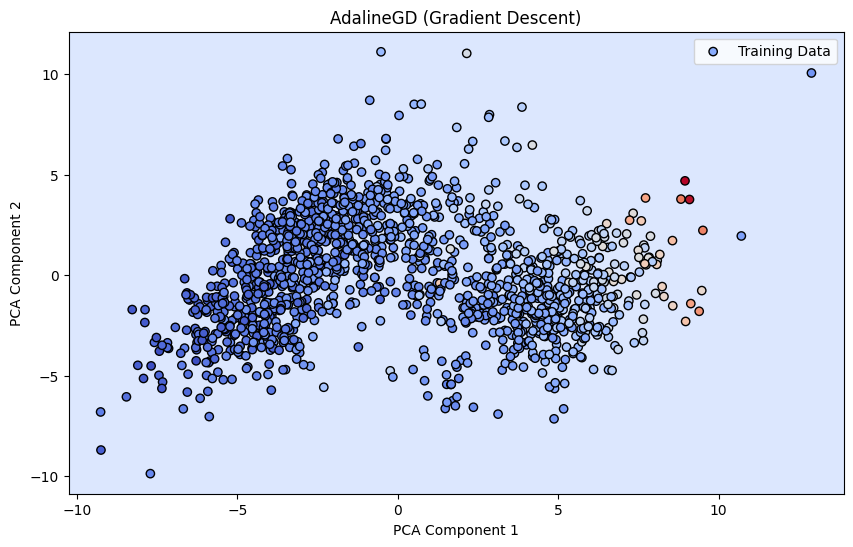

In [147]:
# AdalineGD 결정 경계 시각화
xx, yy = np.meshgrid(
    np.linspace(X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1, 100),
    np.linspace(X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1, 100)
)
Z = adaline_gd.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap='coolwarm', edgecolor='k', label="Training Data")
plt.title("AdalineGD (Gradient Descent)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

In [105]:
# AdalineSGD
from sklearn.linear_model import SGDClassifier

adaline_sgd = SGDClassifier(loss='squared_error', max_iter=1000, tol=1e-3, random_state=42)
adaline_sgd.fit(X_train_2d, y_train)
train_accuracy_adaline_sgd = accuracy_score(y_train, adaline_sgd.predict(X_train_2d))
print(f"AdalineSGD Training Accuracy: {train_accuracy_adaline_sgd:.4f}")

AdalineSGD Training Accuracy: 0.0020


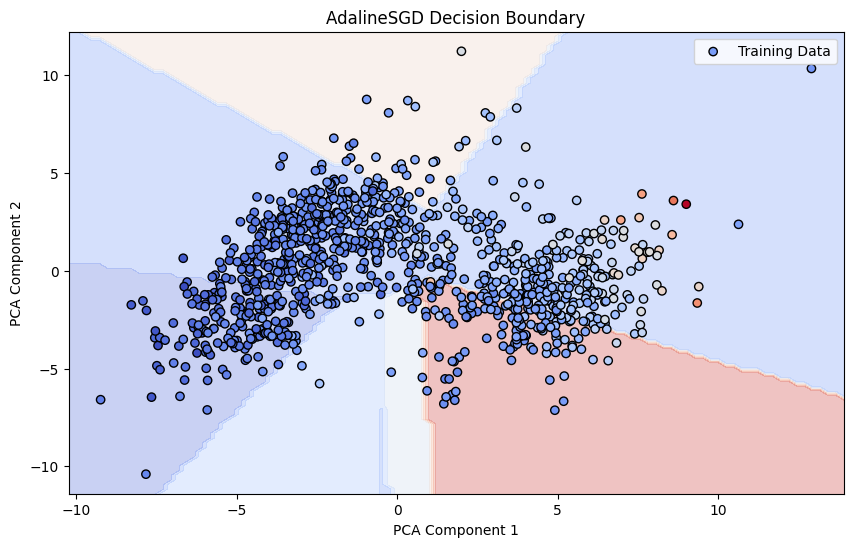

In [106]:
# AdalineSGD 결정 경계 시각화
Z = adaline_sgd.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap='coolwarm', edgecolor='k', label="Training Data")
plt.title("AdalineSGD Decision Boundary")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

In [107]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression 모델 학습
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# 모델 학습 (PCA 적용된 오버샘플링된 훈련 데이터 사용)
log_reg.fit(X_train_2d, y_train)  # y_train_oversampled 사용

# 훈련 데이터 정확도 계산
y_train_pred = log_reg.predict(X_train_2d)
train_accuracy = accuracy_score(y_train, y_train_pred)  # y_train_oversampled 사용
print(f"Logistic Regression Training Accuracy: {train_accuracy:.4f}")

Logistic Regression Training Accuracy: 0.0460


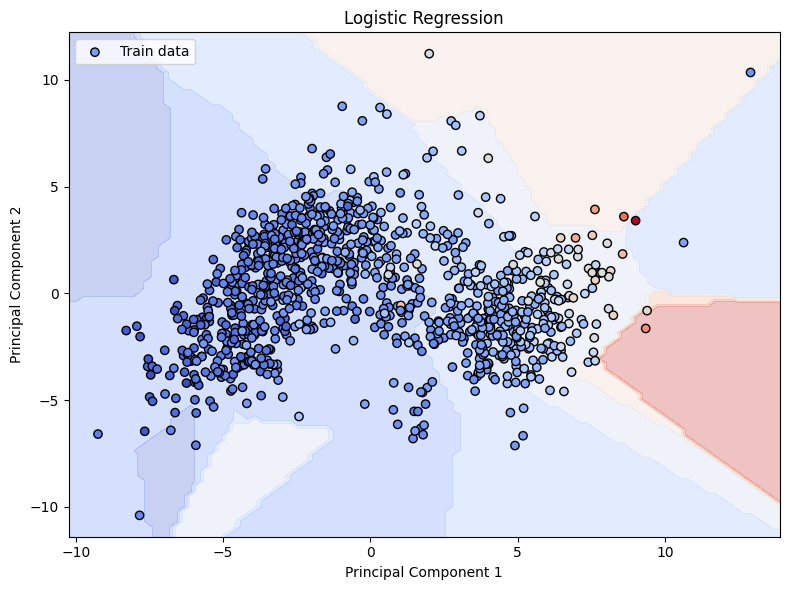

In [108]:
plt.figure(figsize=(8, 6))
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k', marker='o', label='Train data')

plt.title('Logistic Regression')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [109]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_2d, y_train)
train_accuracy_knn = accuracy_score(y_train, knn.predict(X_train_2d))

print("train_accuracy_knn", train_accuracy_knn)

train_accuracy_knn 0.21037181996086105


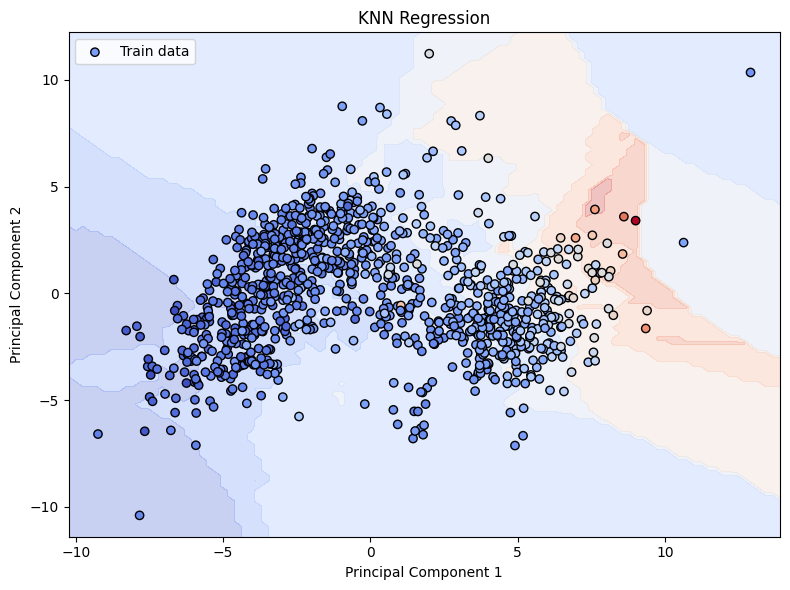

In [110]:
plt.figure(figsize=(8, 6))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k', marker='o', label='Train data')

plt.title('KNN Regression')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [111]:
# DecisionTree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(
    random_state=42,
    max_depth=5,             # 최대 트리 깊이를 제한하여 과적합 방지
    min_samples_split=10,    # 분할에 필요한 최소 샘플 수를 설정
    min_samples_leaf=5       # 리프 노드에 있어야 하는 최소 샘플 수를 설정
)
dt.fit(X_train_2d, y_train)
train_accuracy_dt = accuracy_score(y_train, dt.predict(X_train_2d))

print("train_accuracy_dt",train_accuracy_dt)

train_accuracy_dt 0.07045009784735812


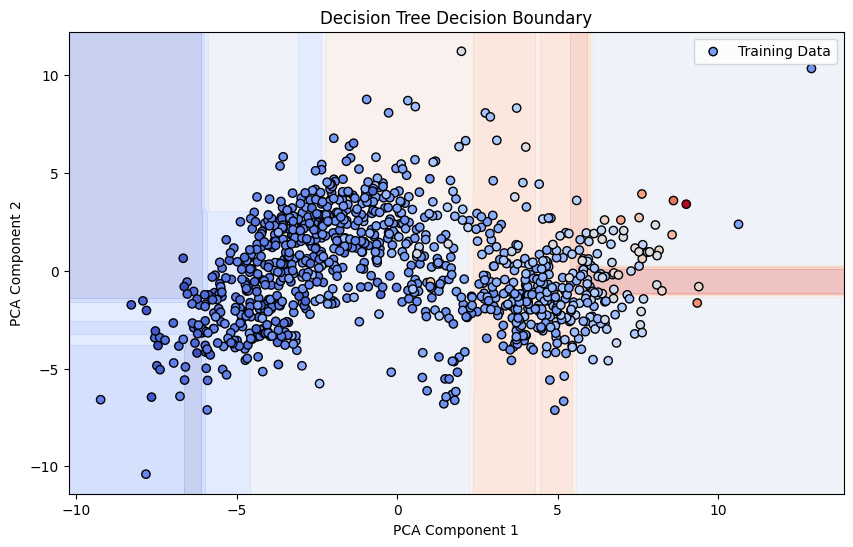

In [112]:
Z = dt.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap='coolwarm', edgecolor='k', label="Training Data")
plt.title("Decision Tree Decision Boundary")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

In [113]:
# SVM
from sklearn.svm import SVC

svm = SVC(random_state=42, kernel='rbf', class_weight='balanced')
svm.fit(X_train_2d, y_train)
train_accuracy_svm = accuracy_score(y_train, svm.predict(X_train_2d))

print("train_accuracy_svm",train_accuracy_svm)


train_accuracy_svm 0.2172211350293542


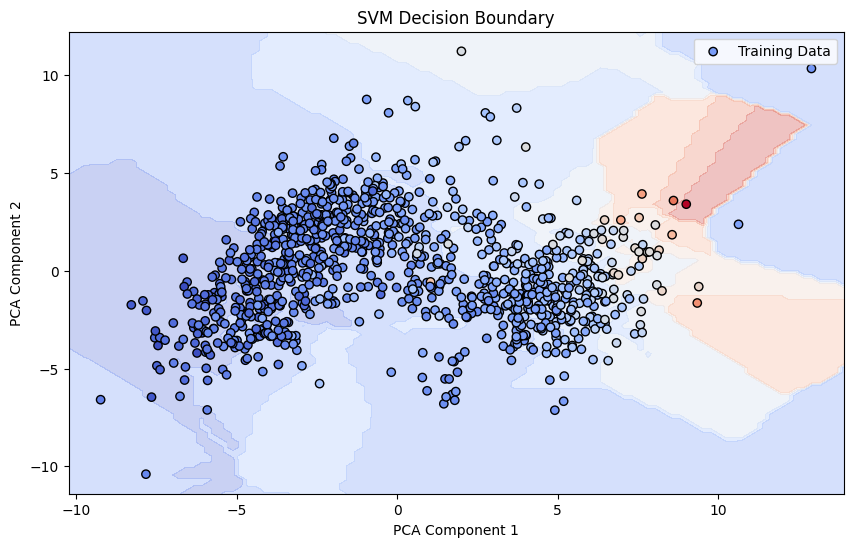

In [114]:
# AdalineSGD 결정 경계 시각화
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap='coolwarm', edgecolor='k', label="Training Data")
plt.title("SVM Decision Boundary")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()

plt.show()

최대로 잘나온 모델에 대해서 test 진행


In [ ]:
perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
perceptron.fit(X_train_2d, y_train)
test_accuracy_perceptron = accuracy_score(y_test, perceptron.predict(X_test_2d))
print(f"Perceptron Test Accuracy: {test_accuracy_perceptron:.4f}")

xx, yy = np.meshgrid(
    np.arange(X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1, 0.1),
    np.arange(X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1, 0.1)
)
Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k', label='Train data')
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, cmap=plt.cm.coolwarm, edgecolors='k', marker='x', label='Test data')
plt.title('Perceptron Decision Boundary')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.linear_model import SGDClassifier

adaline_sgd = SGDClassifier(loss='squared_error', max_iter=1000, tol=1e-3, random_state=42)
adaline_sgd.fit(X_train_2d, y_train)
test_accuracy_adaline_sgd = accuracy_score(y_test, adaline_sgd.predict(X_test_2d))
print(f"Adaline - SGD Test Accuracy: {test_accuracy_adaline_sgd:.4f}")

Z = adaline_sgd.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k', label='Train data')
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, cmap=plt.cm.coolwarm, edgecolors='k', marker='x', label='Test data')
plt.title('Adaline - SGD Decision Boundary')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_2d, y_train)
test_accuracy_log_reg = accuracy_score(y_test, log_reg.predict(X_test_2d))
print(f"Logistic Regression Test Accuracy: {test_accuracy_log_reg:.4f}")

Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k', label='Train data')
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, cmap=plt.cm.coolwarm, edgecolors='k', marker='x', label='Test data')
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_2d, y_train)
test_accuracy_knn = accuracy_score(y_test, knn.predict(X_test_2d))
print(f"KNN Test Accuracy: {test_accuracy_knn:.4f}")

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k', label='Train data')
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, cmap=plt.cm.coolwarm, edgecolors='k', marker='x', label='Test data')
plt.title('KNN Decision Boundary')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_2d, y_train)
test_accuracy_decision_tree = accuracy_score(y_test, decision_tree.predict(X_test_2d))
print(f"Decision Tree Test Accuracy: {test_accuracy_decision_tree:.4f}")

Z = decision_tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k', label='Train data')
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, cmap=plt.cm.coolwarm, edgecolors='k', marker='x', label='Test data')
plt.title('Decision Tree Decision Boundary')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()